<a href="https://colab.research.google.com/github/pedroheyerdahl/cbers04a/blob/main/Task-03/semantic_segmentation_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparing a satellite image dataset for semantic segmentation with Rasterio & FastAI 2

#1. Loading, inspecting and subsampling original scenes with Rasterio

Installing rasterio on the notebook

In [ ]:
!pip install rasterio

     |████████████████████████████████| 19.1MB 1.2MB/s 


Importing the libraries we are going to use. Our primary tool is Rasterio which provides an easy to use API for processing satellite imagery

In [ ]:
import os
import rasterio as rio
import matplotlib.pyplot as plt
from itertools import product
from rasterio import windows
from rasterio.plot import show


Mounting google drive

In [ ]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


Opening the images using rasterio

In [ ]:
sample_image = rio.open('/content/drive/MyDrive/omdena/Sample_dataset/sample_image.tif')
sample_label = rio.open('/content/drive/MyDrive/omdena/Sample_dataset/sample_label.tif')


Plotting loaded image with matplotlib

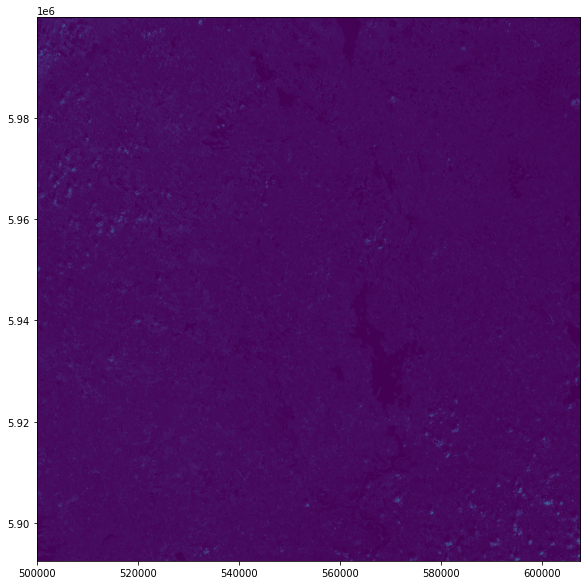

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
show(sample_image, ax=ax)
plt.show()

Plotting labels mask

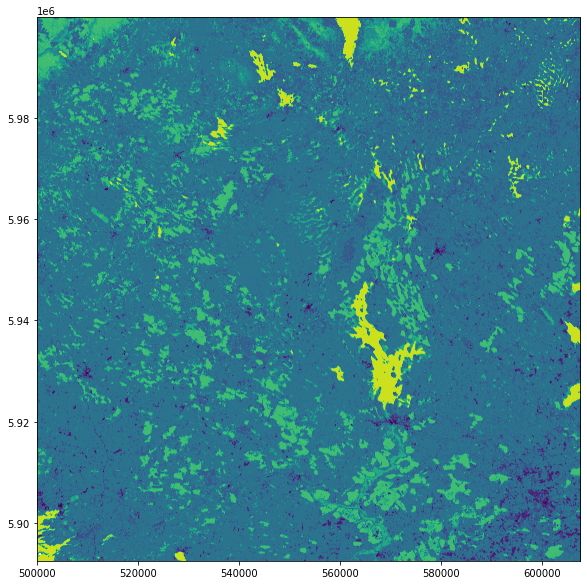

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
show(sample_label, ax=ax)
plt.show()

Checking if image and label have same metadata

In [ ]:
print(sample_image.meta)
print(sample_label.meta)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 10752, 'height': 10752, 'count': 3, 'crs': CRS.from_epsg(32629), 'transform': Affine(10.0, 0.0, 499980.0,
       0.0, -10.0, 5999990.0)}
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 10752, 'height': 10752, 'count': 1, 'crs': CRS.from_epsg(32629), 'transform': Affine(10.0, 0.0, 499980.0,
       0.0, -10.0, 5999990.0)}


##Subseting 256x256 tiles

In [ ]:
def get_tiles(ds, width=256, height=256):
    nols, nrows = ds.meta['width'], ds.meta['height']
    offsets = product(range(0, nols, width), range(0, nrows, height))
    big_window = windows.Window(col_off=0, row_off=0, width=nols, height=nrows)
    for col_off, row_off in  offsets:
        window =windows.Window(col_off=col_off, row_off=row_off, width=width, height=height).intersection(big_window)
        transform = windows.transform(window, ds.transform)
        yield window, transform

Subseting sentinel image tiles

In [ ]:
in_path = '/content/drive/MyDrive/omdena/Sample_dataset/'
input_filename = 'sample_image.tif'

out_path = '/content/drive/MyDrive/omdena/Sample_dataset/images/'
output_filename = 'tile_{}-{}.tif'

with rio.open(os.path.join(in_path, input_filename)) as inds:
      tile_width, tile_height = 256, 256

      meta = inds.meta.copy()

      for window, transform in get_tiles(inds):
          print(window)
          meta['transform'] = transform
          meta['width'], meta['height'] = window.width, window.height
          outpath = os.path.join(out_path,output_filename.format(int(window.col_off), int(window.row_off)))
          with rio.open(outpath, 'w', **meta) as outds:
            
              outds.write(inds.read(window=window))

Window(col_off=0, row_off=0, width=256, height=256)
Window(col_off=0, row_off=256, width=256, height=256)
Window(col_off=0, row_off=512, width=256, height=256)
Window(col_off=0, row_off=768, width=256, height=256)
Window(col_off=0, row_off=1024, width=256, height=256)
Window(col_off=0, row_off=1280, width=256, height=256)
Window(col_off=0, row_off=1536, width=256, height=256)
Window(col_off=0, row_off=1792, width=256, height=256)
Window(col_off=0, row_off=2048, width=256, height=256)
Window(col_off=0, row_off=2304, width=256, height=256)
Window(col_off=0, row_off=2560, width=256, height=256)
Window(col_off=0, row_off=2816, width=256, height=256)
Window(col_off=0, row_off=3072, width=256, height=256)
Window(col_off=0, row_off=3328, width=256, height=256)
Window(col_off=0, row_off=3584, width=256, height=256)
Window(col_off=0, row_off=3840, width=256, height=256)
Window(col_off=0, row_off=4096, width=256, height=256)
Window(col_off=0, row_off=4352, width=256, height=256)
Window(col_off=0

Subseting labels mask

In [ ]:
in_path = '/content/drive/MyDrive/omdena/Sample_dataset/'
input_filename = 'sample_label.tif'

out_path = '/content/drive/MyDrive/omdena/Sample_dataset/labels/'
output_filename = 'tile_{}-{}.tif'

#this is repeated code, maybe transform in a function?
with rio.open(os.path.join(in_path, input_filename)) as inds:
      tile_width, tile_height = 256, 256

      meta = inds.meta.copy()

      for window, transform in get_tiles(inds):
          print(window)
          meta['transform'] = transform
          meta['width'], meta['height'] = window.width, window.height
          outpath = os.path.join(out_path,output_filename.format(int(window.col_off), int(window.row_off)))
          with rio.open(outpath, 'w', **meta) as outds:
            
              outds.write(inds.read(window=window))

Window(col_off=0, row_off=0, width=256, height=256)
Window(col_off=0, row_off=256, width=256, height=256)
Window(col_off=0, row_off=512, width=256, height=256)
Window(col_off=0, row_off=768, width=256, height=256)
Window(col_off=0, row_off=1024, width=256, height=256)
Window(col_off=0, row_off=1280, width=256, height=256)
Window(col_off=0, row_off=1536, width=256, height=256)
Window(col_off=0, row_off=1792, width=256, height=256)
Window(col_off=0, row_off=2048, width=256, height=256)
Window(col_off=0, row_off=2304, width=256, height=256)
Window(col_off=0, row_off=2560, width=256, height=256)
Window(col_off=0, row_off=2816, width=256, height=256)
Window(col_off=0, row_off=3072, width=256, height=256)
Window(col_off=0, row_off=3328, width=256, height=256)
Window(col_off=0, row_off=3584, width=256, height=256)
Window(col_off=0, row_off=3840, width=256, height=256)
Window(col_off=0, row_off=4096, width=256, height=256)
Window(col_off=0, row_off=4352, width=256, height=256)
Window(col_off=0

#2. Creating Fast AI 2 custom DataBlock/DataLoader from image/label pairs
From https://gist.github.com/jaeeolma/88ddd03be2d2d2156cd293d73113051a

There are options using np arrays, but couldn't get it to work. Using option that goes straight from TIF to data loader.


In [ ]:
!pip install -Uq fastai
!pip install -Uq geopandas

     |████████████████████████████████| 194kB 22.4MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 46.2MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
     |████████████████████████████████| 1.0MB 13.1MB/s 
     |████████████████████████████████| 6.5MB 56.2MB/s 
     |████████████████████████████████| 15.3MB 218kB/s 


In [ ]:
import torch
import numpy as np
from PIL import Image
import rasterio as rio
from pathlib import Path
from fastai.basics import *
from fastai.vision.all import *
from fastai.vision.core import *
from fastai.vision.data import *
from fastai.data.all import *
from rasterio.plot import show
import matplotlib.pyplot as plt
from typing import Tuple
import geopandas as gpd

In [ ]:
def open_npy(fn, chans=None):
    im = torch.from_numpy(np.load(str(fn)))
    if chans is not None: im = im[chans]
    return im

def open_geotiff(fn, chans=None):
    with rio.open(str(fn)) as f:
        data = f.read()
        data = data.astype(np.float32)
    im = torch.from_numpy(data)
    if chans is not None: im = im[chans]
    return im

class MultiChannelTensorImage(TensorImage):
    _show_args = ArrayImageBase._show_args
    def show(self, channels=[1], ctx=None, vmin=None, vmax=None, **kwargs):
        "These need refactoring maybe"
        if channels == 'spectra':
            return show_mean_spectra(self, ctx=ctx,  **kwargs)
        if len(channels) == 3: 
            return show_composite(self, channels=channels, ctx=ctx, vmin=vmin, vmax=vmax,
                                  **{**self._show_args, **kwargs})
        if len(channels) == 2:
            return show_normalized_spectral_index(self, channels=channels, ctx=ctx,
                                                  **{**self._show_args, **kwargs})
        elif len(channels) == 1: 
            return show_single_channel(self, channel=channels[0], ctx=ctx, 
                                       **{**self._show_args, **kwargs})

    @classmethod
    def create(cls, fn:(Path,str,ndarray), chans=None,  **kwargs) ->None:
        if isinstance(fn, Tensor): fn = fn.numpy()
        if isinstance(fn, ndarray): 
            im = torch.from_numpy(fn)
            if chans is not None: im = im[chans]
            return cls(im)
        if isinstance(fn, Path) or isinstance(fn, str):
            if str(fn).endswith('npy'): return cls(open_npy(fn=fn, chans=chans))
            elif str(fn).endswith('.tif'): return cls(open_geotiff(fn=fn, chans=chans))
        
    def __repr__(self): return f'{self.__class__.__name__} size={"x".join([str(d) for d in self.shape])}'
    
MultiChannelTensorImage.create = Transform(MultiChannelTensorImage.create) 
        
def show_composite(img, channels, ax=None, figsize=(3,3), title=None, scale=True,
                   ctx=None, vmin=None, vmax=None, scale_axis=(0,1), **kwargs)->plt.Axes:
    "Show three channel composite so that channels correspond to R, G and B"
    ax = ifnone(ax, ctx)
    if ax is None: _, ax = plt.subplots(figsize=figsize)    
    r, g, b = channels
    tempim = img.data.cpu().numpy()
    im = np.zeros((tempim.shape[1], tempim.shape[2], 3))
    im[...,0] = tempim[r]
    im[...,1] = tempim[g]
    im[...,2] = tempim[b]

    if scale: im = norm(im, vmin, vmax, scale_axis)
    ax.imshow(im, **kwargs)
    ax.axis('off')
    if title is not None: ax.set_title(title)
    return ax

def show_single_channel(img, channel, ax=None, figsize=(3,3), ctx=None, 
                        title=None, **kwargs) -> plt.Axes:
    ax = ifnone(ax, ctx)
    if ax is None: _, ax = plt.subplots(figsize=figsize)    
    tempim = img.data.cpu().numpy()
    ax.imshow(norm(tempim[channel], vmin=tempim[channel].min(), vmax=tempim[channel].max()), **kwargs)
    ax.axis('off')
    if title is not None: ax.set_title(title)
    return ax

def show_normalized_spectral_index(img, channels, ax=None, figsize=(3,3), ctx=None,
                                   title=None, **kwargs) -> plt.Axes:
    "Show normalized spectral index such as NDVI"
    ax = ifnone(ax, ctx)
    if ax is None: _, ax = plt.subplots(figsize=figsize)
    b_0, b_1 = channels
    tempim = img.data.cpu().numpy()
    im = (tempim[b_0] - tempim[b_1])/(tempim[b_0] + tempim[b_1])
    ax.imshow(im, vmin=-1, vmax=1, **kwargs)
    ax.axis('off')
    if title is not None: ax.set_title(title)
    return ax

def show_mean_spectra(img, ax=None, figsize=(3,3), ctx=None, title=None, **kwargs) -> plt.Axes:
    "Show average spectra graph"
    ax = ifnone(ax, ctx)
    if ax is None: _, ax = plt.subplots(figsize=figsize)
    tempim = img.data.cpu().numpy()
    means = np.nanmean(tempim, axis=(-2, -1))
    ax.plot(means, **kwargs)
    ax.grid(True)
    if title is not None: ax.set_title(title)
    return ax
        
def norm(vals, vmin=None, vmax=None, axis=(0,1)):
    """
    For visualization purposes scale image with `(vals-vmin)/(vmax-vmin), 
    with vmin and vmax either specified or within 0.01 and 0.99 quantiles of all values
    """
    vmin = ifnone(vmin, np.quantile(vals, 0.01, axis=axis))
    vmax = ifnone(vmax, np.quantile(vals, 0.99, axis=axis))
    ret_im = (vals - vmin)/(vmax-vmin)
    ret_im[ret_im < 0] = 0
    ret_im[ret_im > 1] = 1
    return ret_im

In [ ]:
def MultiChannelImageBlock(cls=MultiChannelTensorImage, chans=None): 
    "Default behaviour: use all channels"
    return TransformBlock(partial(cls.create, chans=chans))

In [ ]:
def _using_attr(f, attr, x):
    return f(getattr(x,attr))

def using_attr(f, attr):
    "Change function `f` to operate on `attr`"
    return partial(_using_attr, f, attr)

class MultiChannelImageDataLoaders(DataLoaders):
    @classmethod
    @delegates(DataLoaders.from_dblock)
    def from_folder(cls, path, chans=None, extensions=['.tif'], 
                    train='train', valid='valid', valid_pct=None, seed=None, 
                    vocab=None, item_tfms=None, batch_tfms=None, **kwargs):
        """Create from imagenet style dataset in `path` with `train`, `valid`, `test` subfolders (or provide `valid_pct`).
        Optionally list the channels to use."""
        splitter = GrandparentSplitter(train_name=train, valid_name=valid) if valid_pct is None else RandomSplitter(valid_pct, seed=seed)
        dblock = DataBlock(blocks=(MultiChannelImageBlock(chans=chans), CategoryBlock(vocab=vocab)),
                           get_items=partial(get_files, extensions=extensions),
                           splitter=splitter,
                           get_y=parent_label,
                           item_tfms=item_tfms,
                           batch_tfms=batch_tfms)
        return cls.from_dblock(dblock, path, path=path, **kwargs)

    @classmethod
    @delegates(DataLoaders.from_dblock)
    def from_path_func(cls, path, fnames, label_func,chans=None, extensions=['.tif'], 
                       valid_pct=0.2, seed=None, item_tfms=None, batch_tfms=None, **kwargs):
        """Create from list of `fnames` in `path`s with `label_func`.   
        Optionally list the channels to use."""

        dblock = DataBlock(blocks=(MultiChannelImageBlock(chans=chans), CategoryBlock(vocab=vocab)),
                           splitter=RandomSplitter(valid_pct, seed=seed),
                           get_y=label_func,
                           item_tfms=item_tfms,
                           batch_tfms=batch_tfms)
        return cls.from_dblock(dblock, path, path=path, **kwargs)
    
    @classmethod
    def from_name_func(cls, path, fnames, label_func, 
                       chans=None, extensions=['.tif'], **kwargs):
        """Create from name attrs in list of `fnames` in `path`s with `label_func`.
        Optionally list the channels to use."""
        f = using_attr(label_func, 'name')
        return cls.from_path_func(path, fnames, f, chans=chans, **kwargs)

    @classmethod
    def from_path_re(cls, path, fnames, pat, chans=None, extensions=['.tif'], **kwargs):
        """Create from list of `fnames` in `path`s with re expression `pat`.
           Optionally list the channels to use."""
        return cls.from_path_func(path, fnames, RegexLabeller(pat), chans=chans, **kwargs)

    @classmethod
    @delegates(DataLoaders.from_dblock)
    def from_name_re(cls, path, fnames, pat, chans=None, extensions=['.tif'],**kwargs):
        """Create from name attrs in list of `fnames` in `path`s with re expression `pat`.
           Optionally list the channels to use"""
        return cls.from_name_func(path, fnames, RegexLabeller(pat), chans=chans, **kwargs)

    @classmethod
    @delegates(DataLoaders.from_dblock)
    def from_df(cls, df, path='.', chans=None, valid_pct=0.2, seed=None, 
                fn_col=0, folder=None, suff='', label_col=1, label_delim=None,
                y_block=None, valid_col=None, item_tfms=None, batch_tfms=None, **kwargs):
        pref = f'{Path(path) if folder is None else Path(path)/folder}{os.path.sep}'
        if y_block is None:
            is_multi = (is_listy(label_col) and len(label_col) > 1) or label_delim is not None
            y_block = MultiCategoryBlock if is_multi else CategoryBlock
        splitter = RandomSplitter(valid_pct, seed=seed) if valid_col is None else ColSplitter(valid_col)
        dblock = DataBlock(blocks=(MultiChannelImageBlock(chans=chans), y_block),
                           get_x=ColReader(fn_col, pref=pref, suff=suff),
                           get_y=ColReader(label_col, label_delim=label_delim),
                           splitter=splitter,
                           item_tfms=item_tfms, 
                           batch_tfms=batch_tfms)
        return cls.from_dblock(dblock, df, path=path, **kwargs)

    @classmethod
    def from_shapefile(cls, path, chans=None, shp_fname='labels.shp', **kwargs):
        """Create from shapefile `shp_fname` in `path` readable with geopandas.
        Optionally list the channels to use."""
        df = gpd.read_file(str(Path(path)/shp_fname))
        # Shapefiles don't support boolean columns
        if 'valid_col' in kwargs.keys(): df[kwargs['valid_col']] = df[kwargs['valid_col']].astype(bool)
        return cls.from_df(df, path=path, chans=chans, **kwargs)
    
    @classmethod
    def from_csv(cls, path,  chans=None, csv_fname='labels.csv', 
                 header='infer', delimiter=None, **kwargs):
        df = pd.read_csv(Path(path)/csv_fname, header=header, delimiter=delimiter)
        return cls.from_df(df, path=path, chans=chans, **kwargs)

    @classmethod
    @delegates(DataLoaders.from_dblock)
    def from_lists(cls, path, fnames, labels,chans=None, valid_pct=0.2, 
                   seed:int=None, y_block=None, item_tfms=None, batch_tfms=None,
                   **kwargs):
        """Create from list of `fnames` in `path`. Specify dims to be either 2 (for 2d images) or 3 (for volumetric images)
        and optionally list the channels to use."""
        if y_block is None:
            y_block = MultiCategoryBlock if is_listy(labels[0]) and len(labels[0]) > 1 else (
                RegressionBlock if isinstance(labels[0], float) else CategoryBlock)
        dblock = DataBlock(blocks=(MultiChannelImageBlock(dims=dims, chans=chans), y_block),
                           splitter=RandomSplitter(valid_pct, seed=seed),
                           item_tfms=item_tfms, 
                           batch_tfms=batch_tfms)
        return cls.from_dblock(dblock, (fnames, labels), path=path, **kwargs)
    
MultiChannelImageDataLoaders.from_csv = delegates(to=MultiChannelImageDataLoaders.from_df)(MultiChannelImageDataLoaders.from_csv)
MultiChannelImageDataLoaders.from_shapefile = delegates(to=MultiChannelImageDataLoaders.from_df)(MultiChannelImageDataLoaders.from_shapefile)
MultiChannelImageDataLoaders.from_name_func = delegates(to=MultiChannelImageDataLoaders.from_path_func)(MultiChannelImageDataLoaders.from_name_func)
MultiChannelImageDataLoaders.from_path_re = delegates(to=MultiChannelImageDataLoaders.from_path_func)(MultiChannelImageDataLoaders.from_path_re)
MultiChannelImageDataLoaders.from_name_re = delegates(to=MultiChannelImageDataLoaders.from_name_func)(MultiChannelImageDataLoaders.from_name_re)

In [ ]:
class TifSegmentationDataLoaders(DataLoaders):
    "Needs a better name"
    @classmethod
    @delegates(DataLoaders.from_dblock)
    def from_label_funcs(cls, path, fnames, label_func, chans=None, 
                         extensions=['.tif'], valid_pct=0.2, seed=None, 
                         codes=None, item_tfms=None, batch_tfms=None, **kwargs):
        "Create from list of `fnames` in `path`s with `label_func`."
        dblock = DataBlock(blocks=(MultiChannelImageBlock(chans=chans), 
                                   MaskBlock(codes=codes)),
                           splitter=RandomSplitter(valid_pct, seed=seed),
                           get_y=label_func,
                           item_tfms=item_tfms,
                           batch_tfms=batch_tfms)
        res = cls.from_dblock(dblock, fnames, path=path, **kwargs)
        return res

In [ ]:
## Path for data loader to train.
path = Path('/content/drive/MyDrive/omdena/Sample_dataset/')
## Codes are the classes required.
codes = np.array(['clouds', 'artificial surfaces and constructions', 
'cultivated areas', 'vineyards', 'broadleaf tree cover', 
'coniferous tree cover', 'herbaceous vegetation', 
'moors and heathland', 'sclerophyllous vegetation', 
'marshes', 'peatbogs', 'natural material surfaces', 
'permanent snow covered surfaces', 'water bodies', 
'no data'])

## get_image_files load data from file paths
fnames = get_image_files(path/"images")
## function to return the label name from the folder.
def label_func(fn): return path/"labels"/f"{fn.stem}{'.tif'}"


## SegmentationDataLoaders is used as the data loader.
segm = TifSegmentationDataLoaders.from_label_funcs(
    path, bs=8, fnames = fnames, label_func = label_func, codes = codes
)

In [ ]:
segm.one_batch()

(MultiChannelTensorImage size=8x3x256x256,
 TensorMask([[[ 4,  4,  4,  ...,  6,  6,  6],
          [ 5,  5,  6,  ...,  6,  6,  6],
          [ 4,  4,  6,  ...,  6,  6,  6],
          ...,
          [ 9,  9,  9,  ...,  6,  6,  6],
          [ 9,  9,  9,  ...,  4,  4,  6],
          [ 9,  9,  9,  ...,  4,  4,  6]],
 
         [[ 6,  6,  6,  ...,  6,  6,  6],
          [ 6,  6,  6,  ...,  6,  6,  6],
          [ 6,  6,  6,  ...,  6,  6,  6],
          ...,
          [ 6,  6,  6,  ...,  6,  6,  6],
          [ 6,  6,  6,  ...,  6,  6,  6],
          [ 6,  6,  6,  ...,  6,  6,  6]],
 
         [[ 6,  6,  6,  ...,  7,  7,  6],
          [ 6,  6,  6,  ...,  7,  7,  6],
          [ 6,  6,  6,  ...,  7,  6,  7],
          ...,
          [ 6,  6,  6,  ...,  6,  6,  6],
          [ 6,  6,  6,  ...,  6,  6,  6],
          [ 6,  5,  6,  ...,  6,  6,  6]],
 
         ...,
 
         [[ 6,  6,  6,  ...,  5,  5,  5],
          [ 6,  6,  6,  ...,  4,  5,  5],
          [ 6,  6,  6,  ...,  4,  4,  4],
 

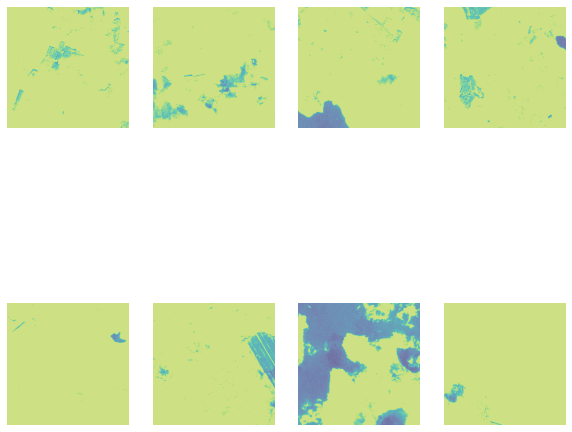

In [ ]:
segm.show_batch(vmin=0.0, vmax=1.,figsize=(10,10))

In [ ]:
metrics=[foreground_acc, Dice]

In [ ]:
learn = unet_learner(segm, resnet34,
                     metrics=metrics)
learn.summary()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


DynamicUnet (Input shape: 8)
Layer (type)         Output Shape         Param #    Trainable 
                     8 x 64 x 128 x 128  
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                      

In [ ]:
#learn.lr_find(suggestions=True)

In [ ]:
learn.fine_tune(10, base_lr=1e-3)

epoch,train_loss,valid_loss,foreground_acc,dice,time
0,0.882229,0.677707,0.786973,6.772000,05:56


epoch,train_loss,valid_loss,foreground_acc,dice,time
0,0.696909,0.617449,0.802654,6.722306,01:24
1,0.667285,0.602879,0.801851,6.728779,01:23
2,0.628716,0.604605,0.798798,6.663074,01:23
3,0.600235,0.564598,0.812563,6.739473,01:23
4,0.569582,0.559801,0.815138,6.753611,01:23
5,0.561597,0.549622,0.817212,6.766406,01:23
6,0.536686,0.529777,0.823520,6.765197,01:23
7,0.508287,0.526219,0.825064,6.766233,01:23
8,0.493514,0.525813,0.824876,6.755919,01:23
9,0.493899,0.525488,0.825566,6.761226,01:23


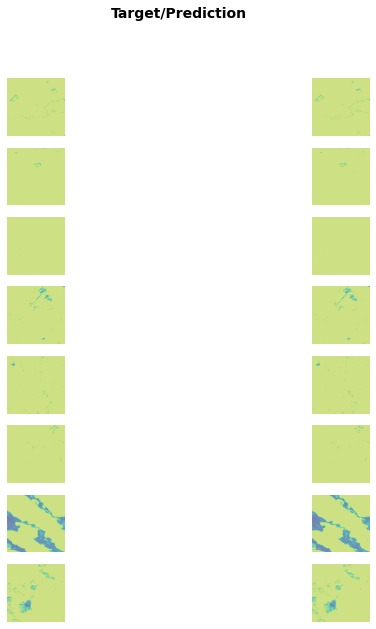

In [ ]:
learn.show_results(vmin=0., vmax=1.,figsize=(10,10))

In [ ]:
learn.save('/content/drive/MyDrive/omdena/Sample_dataset/models/resnet50_dice')

Path('/content/drive/MyDrive/omdena/Sample_dataset/models/resnet50_dice.pth')